In [1]:
import numpy as np
import matplotlib.pyplot as plt
import botorch
import torch
import warnings

from botorch.optim import optimize_acqf
from botorch.acquisition import LogExpectedImprovement
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood

warnings.filterwarnings("ignore")

/Users/rezaghasemi/Documents/gitprojects/hyperparameter-tunning-BO/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def func(inputs):
    res = []
    for input in inputs:
        res.append(np.sin(input)* (input**2) + 5) #np.sin(input)* (input**2) + 5
    res = torch.tensor(res, dtype=torch.float32)
    return res

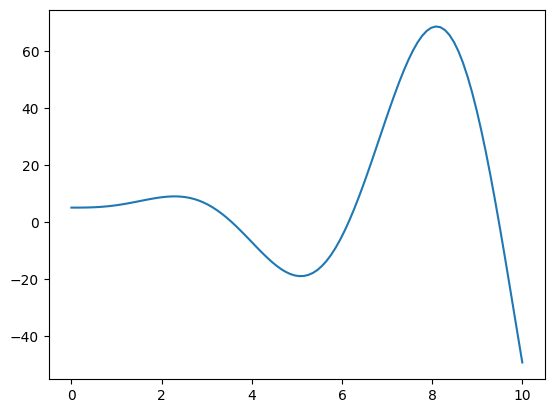

In [3]:
X = np.linspace(0, 10, 100)
Y = func(X)

plt.plot(X, Y)
plt.show()

In [ ]:
train_x = 10 *torch.rand(10).unsqueeze(-1)
train_y = func(train_x).unsqueeze(-1)

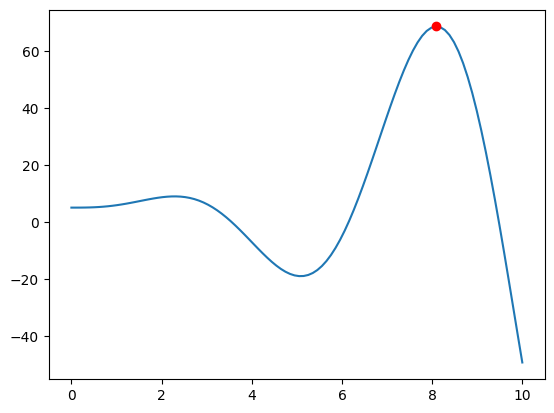

Final ansewer: 68.63497924804688


In [6]:
max = train_y.max()
max_iter = 20
X = np.linspace(0, 10, 100)
Y = func(X)

for iter in range(max_iter):
    gp = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
    logEI = LogExpectedImprovement(model=gp, best_f=train_y.max())

    bounds = torch.stack([torch.tensor([0]), torch.tensor([10])]).to(torch.float32)
    candidate, acq_value = optimize_acqf(
        logEI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
    )

    # print(f'Candidate: {candidate} Value: {func(candidate)}')
    train_x = torch.cat([train_x, candidate])
    train_y = torch.cat([train_y, func(candidate).unsqueeze(-1)])

    best_point = torch.max(train_y).item()


plt.plot(X, Y)
plt.scatter(candidate, best_point, color='red', zorder=5)
plt.show()
print(f'Final ansewer: {best_point}')

